In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# We import a csv that we compiled from the MathSciNet database

# This csv will be imported into a pandas dataframe where each row represents 
# a faculty member and each column represents a reference number.
# Each cell represents the number of times that a faculty member references a certain paper.

references = pd.read_csv('references_count.csv',index_col=0)

references.index = [i.split("_")[0] for i in references.index.values.tolist()]

m = 30
n = 18

In [3]:
references

,MR2000466,MR1802511,MR0268123,MR0214540,MR1862931,MR1874518,MR0205958,MR0227105,MR1046750,MR1605752,...,MR0608786,MR0798079,MR0937537,MR1153029,MR0197862,MR1000692,MR1150330,MR0402198,MR1157554,MR1183719
AhlgrenScottD,6,8,8,4,4,2,4,4,1,2,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Here we make sure to sort the faculty members alphabetically just for convenience

references = references.sort_index()

In [5]:
# The code here serves to remove any column that contains only one non-zero element. 
# This serves to possibly improve the variation distribution among the principal components after PCA is conducted.


for col in references:
    if np.count_nonzero(references[col]) == 1:
        references.drop(col, axis=1, inplace= True)


In [6]:

nan_values = references.isnull().sum()

# Check for infinite values
inf_values = references.applymap(np.isinf).sum()

print("Number of NaN values in each column:\n", nan_values)
print("\nNumber of Infinite values in each column:\n", inf_values)

C:\Users\adamw\AppData\Local\Temp\ipykernel_19528\310284897.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inf_values = references.applymap(np.isinf).sum()


Number of NaN values in each column:
 MR0268123    0
MR2112196    0
MR0434996    0
MR2920749    0
MR0332663    0
            ..
MR1741843    0
MR0778970    0
MR2759813    0
MR0415962    0
MR2172781    0
Length: 3437, dtype: int64

Number of Infinite values in each column:
 MR0268123    0
MR2112196    0
MR0434996    0
MR2920749    0
MR0332663    0
            ..
MR1741843    0
MR0778970    0
MR2759813    0
MR0415962    0
MR2172781    0
Length: 3437, dtype: int64


In [7]:
# Check for rows with sum of absolute values equal to zero (for L1)
zero_sum_rows_l1 = (references.abs().sum(axis=1) == 0)

# Check for rows with sum of squared values equal to zero (for L2)
zero_sum_rows_l2 = (references.pow(2).sum(axis=1) == 0)

print("Rows with sum of absolute values equal to zero:", zero_sum_rows_l1.sum())
print("Rows with sum of squared values equal to zero:", zero_sum_rows_l2.sum())

# Identify indices of rows with sum of absolute values equal to zero (for L1)
indices_l1_zero_sum = references.index[references.abs().sum(axis=1) == 0].tolist()

# Identify indices of rows with sum of squared values equal to zero (for L2)
indices_l2_zero_sum = references.index[references.pow(2).sum(axis=1) == 0].tolist()

print("Indices of rows with sum of absolute values equal to zero:", indices_l1_zero_sum)
print("Indices of rows with sum of squared values equal to zero:", indices_l2_zero_sum)


Rows with sum of absolute values equal to zero: 1
Rows with sum of squared values equal to zero: 1
Indices of rows with sum of absolute values equal to zero: ['QuanZhiyu']
Indices of rows with sum of squared values equal to zero: ['QuanZhiyu']


In [8]:
references = references.drop("QuanZhiyu", axis=0)

In [48]:
# L1 & L2 Normalization

# In an effort to standardize the data, we applied the L1-norm and the L2-norm row-wise.

references_l1 = references.divide(references.abs().sum(axis=1), axis=0)
l2_norm = references.pow(2).sum(axis=1).pow(0.5)
references_l2 = references.divide(l2_norm, axis=0)

In [49]:
references_l1

,MR0268123,MR2112196,MR0434996,MR2920749,MR0332663,MR3616493,MR2135178,MR0434929,MR0066496,MR1625181,...,MR1511670,MR0350069,MR0672839,MR0394451,MR0107725,MR1741843,MR0778970,MR2759813,MR0415962,MR2172781
AhlgrenScottD,0.038095,0.014286,0.028571,0.004762,0.042857,0.004762,0.004762,0.004762,0.004762,0.014286,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AlbinPierre,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BaloghJózsef,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BaryshnikovYuliyM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Berwick-EvansDaniel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000
YongAlexanderTF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005988,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.005988,0.000000,0.000000
YoungAmanda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455
ZaharescuAlexandru,0.000000,0.000601,0.001203,0.000000,0.000000,0.000000,0.000601,0.002405,0.000601,0.003608,...,0.000000,0.0,0.0,0.000000,0.001203,0.000000,0.000000,0.000000,0.000601,0.000601


In [50]:
references_l2

,MR0268123,MR2112196,MR0434996,MR2920749,MR0332663,MR3616493,MR2135178,MR0434929,MR0066496,MR1625181,...,MR1511670,MR0350069,MR0672839,MR0394451,MR0107725,MR1741843,MR0778970,MR2759813,MR0415962,MR2172781
AhlgrenScottD,0.290573,0.108965,0.217930,0.036322,0.326895,0.036322,0.036322,0.036322,0.036322,0.108965,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
AlbinPierre,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
BaloghJózsef,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
BaryshnikovYuliyM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Berwick-EvansDaniel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.166667,0.000000
YongAlexanderTF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029450,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.02945,0.000000,0.000000
YoungAmanda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.154303
ZaharescuAlexandru,0.000000,0.008116,0.016231,0.000000,0.000000,0.000000,0.008116,0.032462,0.008116,0.048694,...,0.000000,0.0,0.0,0.000000,0.016231,0.000000,0.000000,0.00000,0.008116,0.008116


In [51]:
# Apply PCA to reduce the dimension

# Choose two dimensions to project the dataset down to a plane for visualization.

pca = PCA(n_components=m)

# Conduct PCA on the L1-norm standardized dataset

principalComponents_l1 = pca.fit_transform(references_l1)

# Conduct PCA on the L2-norm standardized dataset

principalComponents_l2 = pca.fit_transform(references_l2)

In [52]:
ref_l1_pca = pd.DataFrame(principalComponents_l1) #, columns=['PC1', 'PC2']
ref_l1_pca.index = references_l1.index

print(ref_l1_pca)

                           0         1         2         3         4   \
AhlgrenScottD       -0.008256 -0.004669 -0.002081 -0.011345 -0.007360   
AlbinPierre         -0.008967 -0.004121 -0.001596 -0.011871 -0.008387   
BaloghJózsef        -0.007660 -0.004284 -0.001843 -0.010495 -0.006593   
BaryshnikovYuliyM   -0.008763 -0.001820  0.001032 -0.008853 -0.007105   
Berwick-EvansDaniel -0.008731 -0.005170 -0.001841 -0.011938 -0.008076   
...                       ...       ...       ...       ...       ...   
WuXuan              -0.005345 -0.006141 -0.002935 -0.015337 -0.010362   
YongAlexanderTF     -0.009339 -0.007728 -0.011161  0.002831 -0.007619   
YoungAmanda         -0.003354 -0.007222 -0.003332 -0.019958 -0.015384   
ZaharescuAlexandru  -0.007922 -0.004525 -0.002099 -0.010432 -0.006792   
ZharnitskyVadim     -0.008346 -0.004696 -0.001960 -0.011764 -0.007579   

                           5         6         7         8         9   ...  \
AhlgrenScottD       -0.004968 -0.001356 -0.00

In [65]:
ref_l2_pca = pd.DataFrame(principalComponents_l2) #, columns=['PC1', 'PC2']
ref_l2_pca.index = references_l2.index

print(ref_l2_pca)

                           0         1         2         3         4   \
AhlgrenScottD       -0.053692  0.182561 -0.114419  0.043440  0.113839   
AlbinPierre         -0.036381 -0.086861  0.041527 -0.109014  0.014908   
BaloghJózsef        -0.002761  0.029163  0.015197 -0.011397  0.018714   
BaryshnikovYuliyM    0.107812 -0.084580  0.060850 -0.014511  0.007792   
Berwick-EvansDaniel -0.105215 -0.142650 -0.062094  0.046374  0.027631   
...                       ...       ...       ...       ...       ...   
WuXuan              -0.014339 -0.001019  0.022934 -0.001549  0.037752   
YongAlexanderTF     -0.069485 -0.072897  0.048813  0.005474  0.039683   
YoungAmanda          0.022073  0.006740  0.015636 -0.010388 -0.000893   
ZaharescuAlexandru  -0.030587  0.550787 -0.281029  0.109937  0.451838   
ZharnitskyVadim      0.381207 -0.084152 -0.033170  0.048385 -0.103011   

                           5         6         7         8         9   ...  \
AhlgrenScottD       -0.094576 -0.053338  0.01

In [61]:
sorted_comp_ref = pd.DataFrame()
sorted_comp_ref = pd.concat([sorted_comp_ref, pd.DataFrame(ref_l1_pca.sort_values(by = list(range(8))).index)])

sorted_comp_ref

sorted_comp_ref.to_csv("sorted_pc_ref_L1.csv")

In [62]:
sorted_comp_ref_L2 = pd.DataFrame()
sorted_comp_ref_L2 = pd.concat([sorted_comp_ref_L2, pd.DataFrame(ref_l2_pca.sort_values(by = list(range(8))).index)])

sorted_comp_ref_L2

sorted_comp_ref_L2.to_csv("sorted_pc_ref_L2.csv")

In [63]:
sorted_comp_ref_dn = pd.DataFrame()
i = range(8)

for n in i:
    sorted_comp_ref_dn[n] = pd.DataFrame(ref_l1_pca.sort_values(by = n)).index


sorted_comp_ref_dn

sorted_comp_ref_dn.to_csv("sorted_pc_ref_L1_dn.csv")


In [64]:
sorted_comp_ref_L2_dn = pd.DataFrame()
i = range(8)

for n in i:
    sorted_comp_ref_L2_dn[n] = pd.DataFrame(ref_l2_pca.sort_values(by = n)).index


sorted_comp_ref_L2_dn

sorted_comp_ref_L2_dn.to_csv("sorted_pc_ref_L2_dn.csv")

In [19]:


# Create the scatter plot with hover information

fig_l1 = px.scatter(ref_l1_pca, x='PC1', y='PC2', hover_name=ref_l1_pca.index)
fig_l1.update_traces(marker=dict(size=5))
fig_l1.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] but received: PC1

In [ ]:
#from above plot, we can observe that professor GuzmanRosemary and QuanZhiyu are obvious outliers.
#So we remove them and regenerate the plot
new_l1_pca = ref_l1_pca.drop(['GuzmanRosemaryK','FadinaTolulope', 'WeiWei', 'HaboushWilliamJ'])
fig_newl1 = px.scatter(new_l1_pca, x='PC1', y='PC2', hover_name=new_l1_pca.index)
fig_newl1.update_traces(marker=dict(size=5))
fig_newl1.show()
 

In [ ]:
#for l2 normalization
fig_l2 = px.scatter(ref_l2_pca, x='PC1', y='PC2', hover_name=ref_l2_pca.index)
fig_l2.update_traces(marker=dict(size=5))
fig_l2.show()

In [ ]:
#Remove DiFrancescoPhilippe and KedemRinat

new_l2_pca = ref_l2_pca.drop(['DiFrancescoPhilippe','KedemRinat'])
fig_newl2 = px.scatter(new_l2_pca, x='PC1', y='PC2', hover_name=new_l2_pca.index)
fig_newl2.update_traces(marker=dict(size=5))
fig_newl2.show()

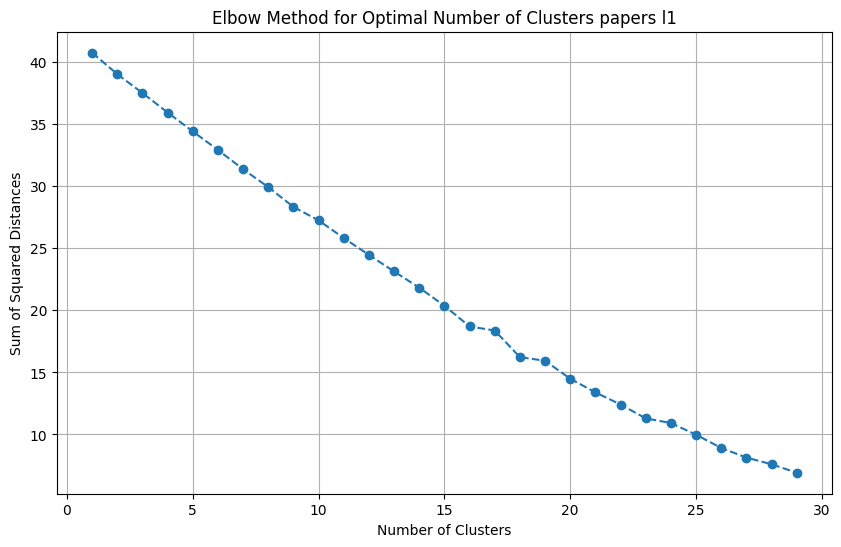

In [20]:
inertia = []
cluster_range = range(1, 30)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 15, random_state=42)
    kmeans.fit(ref_l2_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l1')
plt.grid(True)
plt.show()

In [85]:
data_to_cluster = ref_l2_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_np = data_to_cluster.values


# Fit the KMeans model
kmeans = KMeans(n_clusters=n, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_np)

labels = kmeans.labels_

data_to_cluster['Cluster'] = labels


print(data_to_cluster)

                            0         1         2         3         4  \
AhlgrenScottD       -0.053692  0.182561 -0.114419  0.043440  0.113839   
AlbinPierre         -0.036381 -0.086861  0.041527 -0.109014  0.014908   
BaloghJózsef        -0.002761  0.029163  0.015197 -0.011397  0.018714   
BaryshnikovYuliyM    0.107812 -0.084580  0.060850 -0.014511  0.007792   
Berwick-EvansDaniel -0.105215 -0.142650 -0.062094  0.046374  0.027631   
...                       ...       ...       ...       ...       ...   
WuXuan              -0.014339 -0.001019  0.022934 -0.001549  0.037752   
YongAlexanderTF     -0.069485 -0.072897  0.048813  0.005474  0.039683   
YoungAmanda          0.022073  0.006740  0.015636 -0.010388 -0.000893   
ZaharescuAlexandru  -0.030587  0.550787 -0.281029  0.109937  0.451838   
ZharnitskyVadim      0.381207 -0.084152 -0.033170  0.048385 -0.103011   

                            5         6         7         8         9  ...  \
AhlgrenScottD       -0.094576 -0.053338  0.01

In [86]:
print(data_to_cluster["Cluster"])

AhlgrenScottD           7
AlbinPierre             1
BaloghJózsef           14
BaryshnikovYuliyM       2
Berwick-EvansDaniel     1
                       ..
WuXuan                  1
YongAlexanderTF         2
YoungAmanda             3
ZaharescuAlexandru      5
ZharnitskyVadim         9
Name: Cluster, Length: 69, dtype: int32


In [87]:
clusters_ref = pd.DataFrame(columns = range(n), index = range(70))


for i in range(n):
    clusters_ref[i] =  pd.DataFrame(data_to_cluster.index[data_to_cluster["Cluster"] == i])
    
print(clusters_ref)

clusters_ref.to_csv("clusters_ref.csv")


              0                    1                   2   \
0    FengRunhuan          AlbinPierre   BaryshnikovYuliyM   
1   JingXiaochen  Berwick-EvansDaniel  KirkpatrickKayLene   
2            NaN     DeyParthaSarathi       LeditzkyFelix   
3            NaN      DoddChristopher     YongAlexanderTF   
4            NaN    DuttaSankarPrasad                 NaN   
..           ...                  ...                 ...   
65           NaN                  NaN                 NaN   
66           NaN                  NaN                 NaN   
67           NaN                  NaN                 NaN   
68           NaN                  NaN                 NaN   
69           NaN                  NaN                 NaN   

                       3                    4                   5   \
0   BradlowStevenBenjamin  DiFrancescoPhilippe    BocaFlorin-Petre   
1           CooneyDanielB           KedemRinat  ZaharescuAlexandru   
2           HinkkanenAimo                  NaN           

In [23]:
# Below is the code based on what journal each faculty member published each of their papers in.

In [24]:
# We import a csv that we compiled from the MathSciNet database

# This csv will be imported into a pandas dataframe where each row represents 
# a faculty member and each column represents a journal name.
# Each cell represents the number of papers that a faculty member published in a certain journal.

journals = pd.read_csv('journals_count.csv',index_col=0)
journals.index = [i.split("_")[0] for i in journals.index.values.tolist()]

In [25]:
journals

,T,Ann. Comb.,Math. Ann.,J. Math. Anal. Appl.,Int. Math. Res. Not. IMRN,J. Number Theory,Adv. Math.,Res. Number Theory,Int. J. Number Theory,Math. Proc. Cambridge Philos. Soc.,...,Math. Sci. Res. J.,J. Théor. Nombres Bordeaux,Nihonkai Math. J.,Port. Math. (N.S.),Demonstratio Math.,Int. J. Math. Math. Sci.,C. R. Math. Acad. Sci. Soc. R. Can.,Portugal. Math.,An. Ştiinţ. Univ. Ovidius Constanţa Ser. Mat.,Stud. Cerc. Mat.
AhlgrenScottD,1,1,5,1,2,5,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,2,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,1,0,1,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,1,0,5,18,3,19,12,0,11,4,...,1,2,1,2,1,1,3,2,1,1


In [26]:
# Here we make sure to sort the faculty members alphabetically just for convenience

journals = journals.sort_index() 

In [27]:
# The code here serves to remove any column that contains only one non-zero element. 
# This serves to possibly improve the variation distribution among the principal components after PCA is conducted.

for col in journals:
    if np.count_nonzero(journals[col]) == 1:
        journals.drop(col, axis=1, inplace= True)



In [28]:
nan_values = journals.isnull().sum()

# Check for infinite values and fill them

inf_values = journals.applymap(np.isinf).sum()

print("Number of NaN values in each column:\n", nan_values)
print("\nNumber of Infinite values in each column:\n", inf_values)

Number of NaN values in each column:
 T                                          0
Ann. Comb.                                 0
Math. Ann.                                 0
J. Math. Anal. Appl.                       0
Int. Math. Res. Not. IMRN                  0
                                          ..
Stoch. Anal. Appl.                         0
J. Korean Math. Soc.                       0
Math. Mag.                                 0
Ergodic Theory Dynam. Systems              0
Ann. Sc. Norm. Super. Pisa Cl. Sci. (5)    0
Length: 272, dtype: int64

Number of Infinite values in each column:
 T                                          0
Ann. Comb.                                 0
Math. Ann.                                 0
J. Math. Anal. Appl.                       0
Int. Math. Res. Not. IMRN                  0
                                          ..
Stoch. Anal. Appl.                         0
J. Korean Math. Soc.                       0
Math. Mag.                           

C:\Users\adamw\AppData\Local\Temp\ipykernel_19528\3591530131.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inf_values = journals.applymap(np.isinf).sum()


In [29]:
# Check for rows with sum of absolute values equal to zero (for L1)

zero_sum_rows_l1 = (journals.abs().sum(axis=1) == 0)

# Check for rows with sum of squared values equal to zero (for L2)

zero_sum_rows_l2 = (journals.pow(2).sum(axis=1) == 0)

print("Rows with sum of absolute values equal to zero:", zero_sum_rows_l1.sum())
print("Rows with sum of squared values equal to zero:", zero_sum_rows_l2.sum())

# Identify indices of rows with sum of absolute values equal to zero (for L1)

indices_l1_zero_sum = journals.index[journals.abs().sum(axis=1) == 0].tolist()

# Identify indices of rows with sum of squared values equal to zero (for L2)

indices_l2_zero_sum = journals.index[journals.pow(2).sum(axis=1) == 0].tolist()

print("Indices of rows with sum of absolute values equal to zero:", indices_l1_zero_sum)
print("Indices of rows with sum of squared values equal to zero:", indices_l2_zero_sum)

Rows with sum of absolute values equal to zero: 0
Rows with sum of squared values equal to zero: 0
Indices of rows with sum of absolute values equal to zero: []
Indices of rows with sum of squared values equal to zero: []


In [30]:
# L1 & L2 Noramalization

# In an effort to standardize the data, we applied the L1-norm and the L2-norm row-wise.


journals_l1 = journals.divide(journals.abs().sum(axis=1), axis=0)

l2_norm = journals.pow(2).sum(axis=1).pow(0.5)

journals_l2 = journals.divide(l2_norm, axis=0)

In [31]:
journals_l1

,T,Ann. Comb.,Math. Ann.,J. Math. Anal. Appl.,Int. Math. Res. Not. IMRN,J. Number Theory,Adv. Math.,Res. Number Theory,Int. J. Number Theory,Math. Proc. Cambridge Philos. Soc.,...,Math. Comput. Simulation,J. Symbolic Comput.,J. Integer Seq.,E,Potential Anal.,Stoch. Anal. Appl.,J. Korean Math. Soc.,Math. Mag.,Ergodic Theory Dynam. Systems,Ann. Sc. Norm. Super. Pisa Cl. Sci. (5)
AhlgrenScottD,0.017857,0.017857,0.089286,0.017857,0.035714,0.089286,0.053571,0.017857,0.017857,0.017857,...,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0
AlbinPierre,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.115385,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0
BaloghJózsef,0.000000,0.000000,0.000000,0.000000,0.005780,0.000000,0.005780,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0
BaryshnikovYuliyM,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.034483,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0
Berwick-EvansDaniel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.25,0.0,0.0,0.000000,0.000000,0.0,0.0
YongAlexanderTF,0.000000,0.000000,0.016393,0.000000,0.016393,0.000000,0.065574,0.000000,0.000000,0.000000,...,0.0,0.016393,0.000000,0.00,0.0,0.0,0.000000,0.016393,0.0,0.0
YoungAmanda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0
ZaharescuAlexandru,0.003968,0.000000,0.019841,0.071429,0.011905,0.075397,0.047619,0.000000,0.043651,0.015873,...,0.0,0.000000,0.007937,0.00,0.0,0.0,0.007937,0.000000,0.0,0.0


In [32]:
journals_l2

,T,Ann. Comb.,Math. Ann.,J. Math. Anal. Appl.,Int. Math. Res. Not. IMRN,J. Number Theory,Adv. Math.,Res. Number Theory,Int. J. Number Theory,Math. Proc. Cambridge Philos. Soc.,...,Math. Comput. Simulation,J. Symbolic Comput.,J. Integer Seq.,E,Potential Anal.,Stoch. Anal. Appl.,J. Korean Math. Soc.,Math. Mag.,Ergodic Theory Dynam. Systems,Ann. Sc. Norm. Super. Pisa Cl. Sci. (5)
AhlgrenScottD,0.080064,0.080064,0.400320,0.080064,0.160128,0.400320,0.240192,0.080064,0.080064,0.080064,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
AlbinPierre,0.000000,0.000000,0.000000,0.000000,0.277350,0.000000,0.416025,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
BaloghJózsef,0.000000,0.000000,0.000000,0.000000,0.025794,0.000000,0.025794,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
BaryshnikovYuliyM,0.000000,0.000000,0.000000,0.000000,0.067420,0.000000,0.134840,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Berwick-EvansDaniel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.5,0.0,0.0,0.000000,0.000000,0.0,0.0
YongAlexanderTF,0.000000,0.000000,0.078811,0.000000,0.078811,0.000000,0.315244,0.000000,0.000000,0.000000,...,0.0,0.078811,0.000000,0.0,0.0,0.0,0.000000,0.078811,0.0,0.0
YoungAmanda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
ZaharescuAlexandru,0.022372,0.000000,0.111859,0.402694,0.067116,0.425066,0.268462,0.000000,0.246091,0.089487,...,0.0,0.000000,0.044744,0.0,0.0,0.0,0.044744,0.000000,0.0,0.0


In [67]:
#Apply PCA to reduce the dimension

# Choose two dimensions to project the dataset down to a plane for visualization.

pca = PCA(n_components=30)

# Conduct PCA on the L1-norm standardized dataset

principalComponents_l1 = pca.fit_transform(journals_l1)

# Conduct PCA on the L2-norm standardized dataset

principalComponents_l2 = pca.fit_transform(journals_l2)

In [68]:
journ_l1_pca = pd.DataFrame(principalComponents_l1) # columns=['PC1', 'PC2']
journ_l1_pca.index = journals_l1.index

print(journ_l1_pca)

                           0         1         2         3         4   \
AhlgrenScottD       -0.021908 -0.008093 -0.014374  0.034776 -0.025586   
AlbinPierre         -0.035216 -0.027201  0.001989  0.016212  0.025586   
BaloghJózsef         0.001985  0.028971 -0.071591  0.025642 -0.017837   
BaryshnikovYuliyM   -0.042828 -0.037277  0.016830 -0.037130  0.009114   
Berwick-EvansDaniel -0.044544 -0.044824  0.000439  0.031114 -0.008271   
...                       ...       ...       ...       ...       ...   
WuXuan               0.012597  0.060766 -0.234771  0.003843  0.145786   
YongAlexanderTF     -0.021602 -0.008703 -0.008445  0.047453 -0.013759   
YoungAmanda         -0.053985 -0.056607  0.001013 -0.140260  0.100935   
ZaharescuAlexandru   0.001765  0.029244 -0.068848  0.054360 -0.023203   
ZharnitskyVadim     -0.005027  0.025902 -0.132869 -0.022260  0.044877   

                           5         6         7         8         9   ...  \
AhlgrenScottD       -0.004482 -0.009812  0.00

In [69]:
journ_l2_pca = pd.DataFrame(principalComponents_l2) #columns=['PC1', 'PC2']
journ_l2_pca.index = journals_l2.index

print(journ_l2_pca)

                           0         1         2         3         4   \
AhlgrenScottD       -0.190893 -0.061643  0.050475  0.289037  0.185046   
AlbinPierre         -0.138021  0.115597  0.194881 -0.001247  0.218108   
BaloghJózsef         0.258542 -0.121971 -0.145964 -0.005195 -0.176065   
BaryshnikovYuliyM   -0.288373  0.164019 -0.131224 -0.131753  0.017113   
Berwick-EvansDaniel -0.068345 -0.033583  0.405211  0.036361  0.103242   
...                       ...       ...       ...       ...       ...   
WuXuan               0.478687  0.009040 -0.148821 -0.019565 -0.260031   
YongAlexanderTF     -0.187033 -0.087492  0.101018  0.159338  0.137155   
YoungAmanda         -0.041751  0.290334 -0.106908 -0.198180 -0.092589   
ZaharescuAlexandru   0.124294 -0.127127  0.100159  0.531289  0.213134   
ZharnitskyVadim      0.417329  0.500500  0.205587 -0.083003  0.073405   

                           5         6         7         8         9   ...  \
AhlgrenScottD       -0.101959  0.265721 -0.01

In [75]:
sorted_comp_journ = pd.DataFrame()
sorted_comp_journ = pd.concat([sorted_comp_journ, pd.DataFrame(journ_l1_pca.sort_values(by = list(range(8))).index)])

sorted_comp_journ

sorted_comp_journ.to_csv("sorted_pc_journ_L1.csv")

In [76]:
sorted_comp_journ = pd.DataFrame()
sorted_comp_journ = pd.concat([sorted_comp_journ, pd.DataFrame(journ_l2_pca.sort_values(by = list(range(8))).index)])

sorted_comp_journ

sorted_comp_journ.to_csv("sorted_pc_journ_L2.csv")

In [77]:
sorted_comp_journ_dn = pd.DataFrame()
i = range(8)

for n in i:
    sorted_comp_journ_dn[n] = pd.DataFrame(journ_l1_pca.sort_values(by = n)).index


sorted_comp_journ_dn

sorted_comp_journ_dn.to_csv("sorted_pc_journ_L1_dn.csv")

In [78]:
sorted_comp_journ_L2_dn = pd.DataFrame()
i = range(8)

for n in i:
    sorted_comp_journ_L2_dn[n] = pd.DataFrame(journ_l2_pca.sort_values(by = n)).index


sorted_comp_journ_L2_dn

sorted_comp_journ_L2_dn.to_csv("sorted_pc_journ_L2_dn.csv")

In [38]:
import plotly.express as px

# Create the scatter plot with hover information

fig_l1 = px.scatter(journ_l1_pca, x='PC1', y='PC2', hover_name=journ_l1_pca.index)
fig_l1.update_traces(marker=dict(size=5))
fig_l1.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] but received: PC1

In [39]:
# From above plot, we can observe that professor Fadina Tolulope and Jing XiaoChen are obvious outliers.
# So we remove them and regenerate the plot
new_l1_pca = journ_l1_pca.drop(['FadinaTolulope','JingXiaochen'])
fig_newl1 = px.scatter(new_l1_pca, x='PC1', y='PC2', hover_name=new_l1_pca.index)
fig_newl1.update_traces(marker=dict(size=5))
fig_newl1.show()
 

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] but received: PC1

In [ ]:
# For l2 normalization
fig_l2 = px.scatter(journ_l2_pca, x='PC1', y='PC2', hover_name=journ_l2_pca.index)
fig_l2.update_traces(marker=dict(size=5))
fig_l2.show()

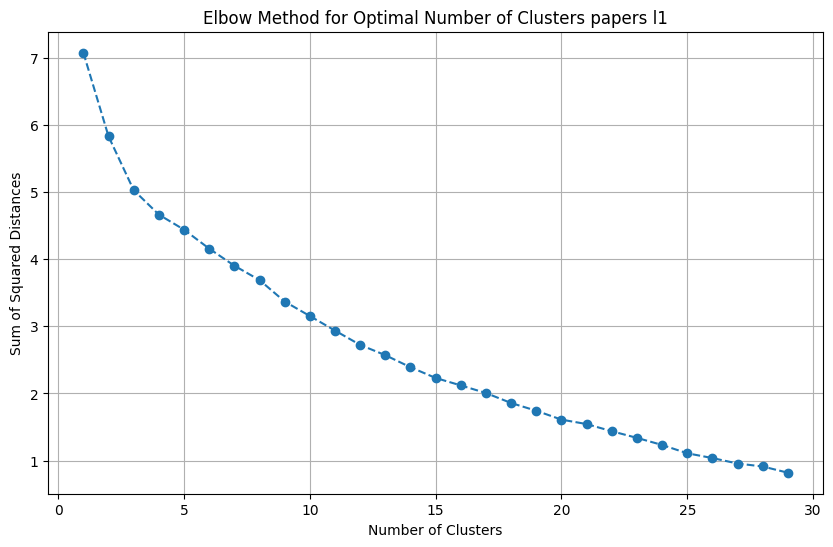

In [40]:
inertia = []
cluster_range = range(1, 30)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 15, random_state=42)
    kmeans.fit(journ_l1_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l1')
plt.grid(True)
plt.show()

In [46]:
data_to_cluster = journ_l2_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_np = data_to_cluster.values


# Fit the KMeans model
kmeans = KMeans(n_clusters=18, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_np)

labels = kmeans.labels_

data_to_cluster['Cluster'] = labels


print(data_to_cluster)

                            0         1         2         3         4  \
AhlgrenScottD       -0.190893 -0.061643  0.050475  0.289037  0.185046   
AlbinPierre         -0.138021  0.115597  0.194881 -0.001247  0.218108   
BaloghJózsef         0.258542 -0.121971 -0.145964 -0.005195 -0.176065   
BaryshnikovYuliyM   -0.288373  0.164019 -0.131224 -0.131753  0.017113   
Berwick-EvansDaniel -0.068345 -0.033583  0.405211  0.036361  0.103242   
...                       ...       ...       ...       ...       ...   
WuXuan               0.478687  0.009040 -0.148821 -0.019565 -0.260031   
YongAlexanderTF     -0.187033 -0.087492  0.101018  0.159338  0.137155   
YoungAmanda         -0.041751  0.290334 -0.106908 -0.198180 -0.092589   
ZaharescuAlexandru   0.124294 -0.127127  0.100159  0.531289  0.213134   
ZharnitskyVadim      0.417329  0.500500  0.205587 -0.083003  0.073405   

                            5         6         7         8         9  ...  \
AhlgrenScottD       -0.101959  0.265721 -0.01

In [47]:
clusters_journ = pd.DataFrame(columns = range(n), index = range(70))


for i in range(n):
    clusters_journ[i] =  pd.DataFrame(data_to_cluster.index[data_to_cluster["Cluster"] == i])
    
print(clusters_journ)

clusters_journ.to_csv("clusters_journ.csv")


                     0             1                 2                   3   \
0   Berwick-EvansDaniel     KermanEly  DeyParthaSarathi       AhlgrenScottD   
1       DoddChristopher  ThornerJesse       SongRenming     YongAlexanderTF   
2       DunfieldNathanM   TolmanSusan    SowersRichardB  ZaharescuAlexandru   
3            JandaFelix           NaN               NaN                 NaN   
4           MineyevIgor           NaN               NaN                 NaN   
..                  ...           ...               ...                 ...   
65                  NaN           NaN               NaN                 NaN   
66                  NaN           NaN               NaN                 NaN   
67                  NaN           NaN               NaN                 NaN   
68                  NaN           NaN               NaN                 NaN   
69                  NaN           NaN               NaN                 NaN   

                           4                   5   

In [65]:
# Below is the code for the MSC of the faculty

In [79]:
# Read the matrix from the csv that has been generated for the MCS of each faculty

# This csv will be imported into a pandas dataframe where each row represents 
# a faculty member and each column represents a MSC code.
# Each cell represents the number of times that a faculty member has published using that MSC code.

msc = pd.read_csv('msc_count.csv', index_col=0)

msc.index = [i.split("_")[0] for i in msc.index.values.tolist()]


m = 30
n = 15

In [80]:
msc

,11,33,05,26,58,57,53,14,46,55,...,31,16,43,40,54,45,41,18,10,00
AhlgrenScottD,52,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,16,1,4,1,1,2,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,7,0,138,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,6,0,9,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,0,0,0,0,2,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,27,0,0,0,0,36,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,301,7,0,1,0,0,0,0,1,0,...,0,0,0,0,2,0,0,0,0,0


In [81]:
msc = msc.sort_index()

In [82]:
# The code here serves to remove any column that contains only one non-zero element. 
# This serves to possibly improve the variation distribution among the principal components after PCA is conducted.


for col in msc:
    if np.count_nonzero(msc[col]) == 1:
        msc.drop(col, axis=1, inplace= True)

In [83]:
msc

,11,33,05,26,58,57,53,14,46,55,...,42,28,12,19,31,43,40,54,41,18
AhlgrenScottD,52,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AlbinPierre,0,0,0,0,16,1,4,1,1,2,...,0,0,0,0,0,0,0,0,0,0
BaloghJózsef,7,0,138,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BaryshnikovYuliyM,0,0,6,0,9,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Berwick-EvansDaniel,0,0,0,0,2,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WuXuan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YongAlexanderTF,0,0,27,0,0,0,0,36,0,0,...,0,0,0,0,0,0,0,0,0,0
YoungAmanda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZaharescuAlexandru,301,7,0,1,0,0,0,0,1,0,...,1,0,13,0,0,0,0,2,0,0


In [84]:
nan_values = msc.isnull().sum()

# Check for infinite values
inf_values = msc.applymap(np.isinf).sum()

print("Number of NaN values in each column:\n", nan_values)
print("\nNumber of Infinite values in each column:\n", inf_values)

Number of NaN values in each column:
 11    0
33    0
05    0
26    0
58    0
57    0
53    0
14    0
46    0
55    0
35    0
06    0
52    0
15    0
94    0
60    0
82    0
91    0
68    0
37    0
30    0
93    0
70    0
81    0
90    0
32    0
62    0
17    0
01    0
47    0
22    0
34    0
49    0
92    0
76    0
78    0
65    0
13    0
39    0
83    0
20    0
42    0
28    0
12    0
19    0
31    0
43    0
40    0
54    0
41    0
18    0
dtype: int64

Number of Infinite values in each column:
 11    0
33    0
05    0
26    0
58    0
57    0
53    0
14    0
46    0
55    0
35    0
06    0
52    0
15    0
94    0
60    0
82    0
91    0
68    0
37    0
30    0
93    0
70    0
81    0
90    0
32    0
62    0
17    0
01    0
47    0
22    0
34    0
49    0
92    0
76    0
78    0
65    0
13    0
39    0
83    0
20    0
42    0
28    0
12    0
19    0
31    0
43    0
40    0
54    0
41    0
18    0
dtype: int64


C:\Users\adamw\AppData\Local\Temp\ipykernel_19528\3645700253.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inf_values = msc.applymap(np.isinf).sum()


In [26]:
# Check for rows with sum of absolute values equal to zero (for L1)
zero_sum_rows_l1 = (msc.abs().sum(axis=1) == 0)

# Check for rows with sum of squared values equal to zero (for L2)
zero_sum_rows_l2 = (msc.pow(2).sum(axis=1) == 0)

print("Rows with sum of absolute values equal to zero:", zero_sum_rows_l1.sum())
print("Rows with sum of squared values equal to zero:", zero_sum_rows_l2.sum())

# Identify indices of rows with sum of absolute values equal to zero (for L1)
indices_l1_zero_sum = msc.index[msc.abs().sum(axis=1) == 0].tolist()

# Identify indices of rows with sum of squared values equal to zero (for L2)
indices_l2_zero_sum = msc.index[msc.pow(2).sum(axis=1) == 0].tolist()

print("Indices of rows with sum of absolute values equal to zero:", indices_l1_zero_sum)
print("Indices of rows with sum of squared values equal to zero:", indices_l2_zero_sum)

Rows with sum of absolute values equal to zero: 0
Rows with sum of squared values equal to zero: 0
Indices of rows with sum of absolute values equal to zero: []
Indices of rows with sum of squared values equal to zero: []


In [27]:
# L1 & L2 Normalization

# In an effort to standardize the data, we applied the L1-norm and the L2-norm row-wise.

msc_l1 = msc.divide(msc.abs().sum(axis=1), axis=0)

l2_norm = msc.pow(2).sum(axis=1).pow(0.5)
msc_l2 = msc.divide(l2_norm, axis=0)

In [28]:
# Apply PCA to reduce the dimension

# Choose two dimensions to project the dataset down to a plane for visualization.

pca = PCA(n_components=m)

# Conduct PCA on the L1-norm standardized dataset

msc_pcomp_l1 = pca.fit_transform(msc_l1)

# Conduct PCA on the L2-norm standardized dataset

msc_pcomp_l2 = pca.fit_transform(msc_l2)



In [29]:
msc_l1_pca = pd.DataFrame(msc_pcomp_l1) #, columns=['PC1', 'PC2']
msc_l1_pca.index = msc_l1.index

print(msc_l1_pca)

                           0         1         2         3         4   \
AhlgrenScottD       -0.489734  0.671123  0.115057  0.199204  0.085045   
AlbinPierre          0.166121  0.034978  0.013054 -0.018375  0.007984   
BaloghJózsef        -0.075643 -0.023676 -0.012822 -0.068533 -0.119464   
BaryshnikovYuliyM   -0.031640 -0.105858 -0.088657  0.080174 -0.015734   
Berwick-EvansDaniel  0.008647 -0.056935  0.125123 -0.031854 -0.029124   
...                       ...       ...       ...       ...       ...   
WuXuan              -0.136470 -0.294113 -0.293812  0.168567  0.228305   
YongAlexanderTF     -0.027619 -0.024304  0.006104 -0.274206 -0.407994   
YoungAmanda         -0.024459 -0.046713 -0.038205 -0.156306 -0.026535   
ZaharescuAlexandru  -0.457937  0.626679  0.106768  0.183279  0.080396   
ZharnitskyVadim     -0.036930 -0.086503 -0.085845 -0.166460  0.234189   

                           5         6         7         8         9   ...  \
AhlgrenScottD        0.022412 -0.114733  0.03

In [30]:
# Sort the faculty by the first principal component

#msc_l1_pca.sort_values(by = 0)

In [31]:
# Sort the faculty by the second principal component

msc_l1_pca.sort_values(by = 1)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
RasmussenSarahDean,0.041476,-0.337165,0.860415,0.192390,0.106737,0.022087,-0.088041,0.038171,-0.032508,-0.082502,...,-0.003449,-0.003471,0.001432,-0.004235,0.002268,0.000645,0.000889,-0.000393,-0.000024,0.001024
GuzmanRosemaryK,0.041476,-0.337165,0.860415,0.192390,0.106737,0.022087,-0.088041,0.038171,-0.032508,-0.082502,...,-0.003449,-0.003471,0.001432,-0.004235,0.002268,0.000645,0.000889,-0.000393,-0.000024,0.001024
DeyParthaSarathi,-0.140379,-0.304848,-0.304916,0.327542,0.084210,0.660479,0.019189,-0.050711,-0.029463,-0.039422,...,-0.041745,0.021398,0.022898,0.007033,0.017668,-0.013541,-0.050738,-0.006896,-0.001811,-0.000196
DunfieldNathanM,0.031128,-0.303924,0.769704,0.158627,0.078665,0.025146,-0.062126,0.085523,-0.015457,-0.016879,...,-0.004083,-0.005856,0.002292,-0.003796,0.002563,0.000774,0.000018,-0.000246,0.000006,0.000346
FadinaTolulope,-0.132421,-0.303243,-0.294667,0.456957,-0.152178,-0.165172,-0.098741,-0.001587,-0.013830,-0.022353,...,-0.013442,-0.034524,-0.058054,-0.013387,0.005610,-0.000544,-0.029623,-0.004592,-0.000679,-0.000617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ReznickBruce,-0.295427,0.385244,0.064994,0.073212,0.007794,0.014171,-0.037654,0.039436,0.003326,-0.022229,...,0.013181,0.020860,-0.012253,0.017243,-0.014731,-0.000899,-0.005149,0.001471,-0.006984,0.019007
FordKevinB,-0.463642,0.615760,0.098212,0.194708,0.077909,0.041471,-0.103690,0.022930,0.009471,-0.024963,...,-0.004074,0.000521,0.018176,0.008800,0.000106,-0.000429,-0.002415,0.006103,-0.002543,-0.002749
ZaharescuAlexandru,-0.457937,0.626679,0.106768,0.183279,0.080396,0.017919,-0.102643,0.013051,0.007641,-0.041317,...,-0.001154,-0.003690,-0.003134,-0.001602,0.000654,0.000991,0.001158,0.000213,0.002881,0.001720
AhlgrenScottD,-0.489734,0.671123,0.115057,0.199204,0.085045,0.022412,-0.114733,0.031683,0.018222,-0.043512,...,-0.008045,-0.005655,-0.001408,0.007504,-0.000502,0.000986,-0.000619,0.007143,-0.002239,-0.002747


In [32]:
# Sort the faculty by the third principal component

msc_l1_pca.sort_values(by = 2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
DeyParthaSarathi,-0.140379,-0.304848,-0.304916,0.327542,0.084210,0.660479,0.019189,-0.050711,-0.029463,-0.039422,...,-0.041745,0.021398,0.022898,0.007033,0.017668,-0.013541,-0.050738,-0.006896,-0.001811,-0.000196
SongRenming,-0.137050,-0.298519,-0.298615,0.307960,0.097214,0.613079,-0.001745,-0.054867,-0.023820,-0.028976,...,-0.007526,-0.010226,0.026012,0.017677,0.007817,-0.003744,-0.051540,0.001424,0.013679,0.001150
FadinaTolulope,-0.132421,-0.303243,-0.294667,0.456957,-0.152178,-0.165172,-0.098741,-0.001587,-0.013830,-0.022353,...,-0.013442,-0.034524,-0.058054,-0.013387,0.005610,-0.000544,-0.029623,-0.004592,-0.000679,-0.000617
WuXuan,-0.136470,-0.294113,-0.293812,0.168567,0.228305,0.494696,-0.083259,-0.048782,-0.011972,-0.015980,...,-0.014570,-0.027411,0.030191,0.015972,-0.019135,-0.006907,-0.040666,-0.014741,-0.009689,-0.000906
JingXiaochen,-0.123480,-0.290699,-0.277266,0.502500,-0.273894,-0.608238,-0.150497,0.029265,-0.006945,-0.016710,...,-0.020632,-0.043093,-0.102107,-0.031640,0.002515,0.000666,-0.014584,-0.003461,0.000808,-0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Berwick-EvansDaniel,0.008647,-0.056935,0.125123,-0.031854,-0.029124,-0.025762,0.194134,-0.243683,0.399190,0.003851,...,-0.020108,-0.063279,0.018045,0.037729,-0.002469,0.014260,-0.011258,0.011744,-0.003041,-0.032987
DunfieldNathanM,0.031128,-0.303924,0.769704,0.158627,0.078665,0.025146,-0.062126,0.085523,-0.015457,-0.016879,...,-0.004083,-0.005856,0.002292,-0.003796,0.002563,0.000774,0.000018,-0.000246,0.000006,0.000346
RasmussenJacob,0.034058,-0.302658,0.773979,0.144108,0.055275,0.028425,-0.098138,0.009288,-0.050713,-0.043854,...,-0.003794,-0.003116,0.001428,-0.003641,0.002084,0.000355,0.000888,0.000014,0.000096,0.002183
RasmussenSarahDean,0.041476,-0.337165,0.860415,0.192390,0.106737,0.022087,-0.088041,0.038171,-0.032508,-0.082502,...,-0.003449,-0.003471,0.001432,-0.004235,0.002268,0.000645,0.000889,-0.000393,-0.000024,0.001024


In [33]:
msc_l2_pca = pd.DataFrame(msc_pcomp_l2) #, columns=['PC1', 'PC2']
msc_l2_pca.index = msc_l2.index

print(msc_l2_pca)

                           0         1         2         3         4   \
AhlgrenScottD       -0.033713  0.650278 -0.338576 -0.521723 -0.120309   
AlbinPierre          0.276777 -0.127734  0.026095 -0.025175  0.120455   
BaloghJózsef        -0.052655  0.147765  0.067388  0.113956 -0.033611   
BaryshnikovYuliyM   -0.164487 -0.020783  0.564643 -0.079493 -0.074243   
Berwick-EvansDaniel  0.087938  0.083068  0.034677  0.117574  0.411537   
...                       ...       ...       ...       ...       ...   
WuXuan              -0.433136 -0.190029  0.467642 -0.173112 -0.132672   
YongAlexanderTF      0.066841  0.247561 -0.018209  0.617038 -0.310141   
YoungAmanda         -0.075477 -0.019849 -0.119519  0.253064 -0.130342   
ZaharescuAlexandru  -0.033167  0.648504 -0.341073 -0.524274 -0.120205   
ZharnitskyVadim     -0.441025 -0.508767 -0.342840 -0.103402  0.011591   

                           5         6         7         8         9   ...  \
AhlgrenScottD       -0.129203 -0.082050 -0.21

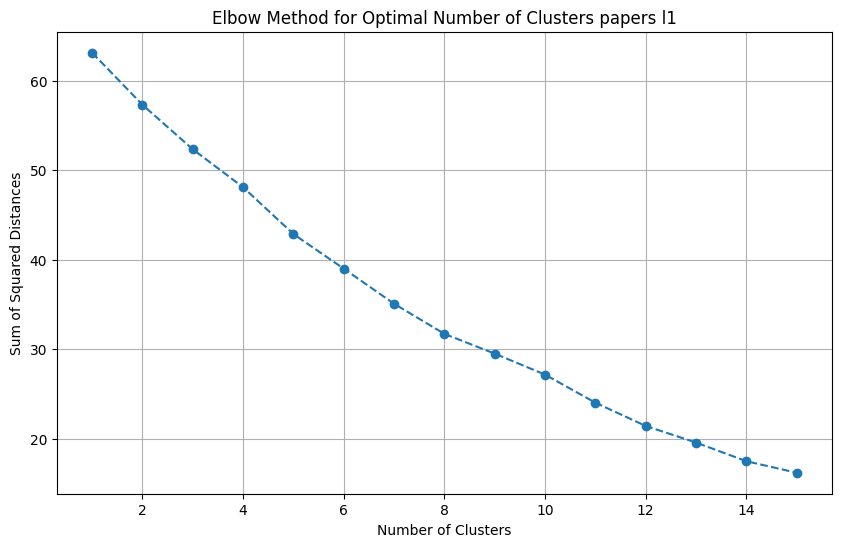

In [37]:
inertia = []
cluster_range = range(1, 16)  # considering 1 to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init= 15, random_state=42)
    kmeans.fit(msc_l2_pca)
    inertia.append(kmeans.inertia_)

# Plotting the sum of squared distances against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters papers l1')
plt.grid(True)
plt.show()

In [38]:
data_to_cluster_msc = msc_l2_pca

# Convert the DataFrame to a numpy array for KMeans fitting
data_to_cluster_msc_np = data_to_cluster_msc.values


# Fit the KMeans model
kmeans = KMeans(n_clusters=n, n_init= 10, random_state= 40)
kmeans.fit(data_to_cluster_msc_np)

labels_msc = kmeans.labels_

data_to_cluster_msc['Cluster'] = labels_msc


#print(data_to_cluster_msc)


In [40]:
clusters_msc = pd.DataFrame(columns = range(11), index = range(20))


for i in range(n):
    clusters_msc[i] =  pd.DataFrame(data_to_cluster_msc.index[data_to_cluster_msc["Cluster"] == i])
    
print(clusters_msc)

clusters_msc.to_csv("clusters_msc.csv")


              0                      1                     2   \
0   DeVilleRELee  BradlowStevenBenjamin           AlbinPierre   
1       RaptiZoi        HaboushWilliamJ      FernandesRuiLoja   
2            NaN      HellerJeremiahBen           HungPei-Ken   
3            NaN             JandaFelix             KermanEly   
4            NaN           KatzSheldonH         LermanEugeneM   
5            NaN        YongAlexanderTF         NikolaevIgorG   
6            NaN                    NaN  PascaleffJamesThomas   
7            NaN                    NaN           TolmanSusan   
8            NaN                    NaN                   NaN   
9            NaN                    NaN                   NaN   
10           NaN                    NaN                   NaN   
11           NaN                    NaN                   NaN   
12           NaN                    NaN                   NaN   
13           NaN                    NaN                   NaN   
14           NaN         